# 4장. 선형회귀 및 로지스틱 회귀

## 4.1 선형 회귀 - 해석적 방법

### 4.1.1 정규방정식

#### 난수 값으로 선형 데이터셋 생성하기

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)          # np.random.rand(m, n): 0~1의 균일분포 난수를 생성한 뒤 배열(m, n)로 저장
y = 4 + 3 * X + np.random.randn(100, 1) # np.random.randn(m, n): 평균 0, 표준편차 1의 가우시안분포 난수를 생성한 뒤 배열(m, n)로 저장

In [2]:
print(X[:5])
print(X.shape)

[[1.57532861]
 [0.34115132]
 [1.74184644]
 [0.35744998]
 [1.79303739]]
(100, 1)


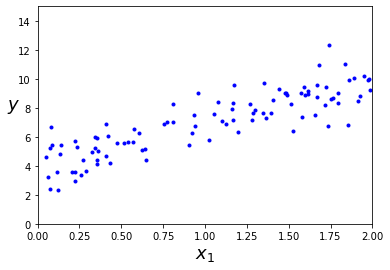

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")                        # b: blue, .: dot
plt.xlabel("$x_1$", fontsize=18)            # $: 기울임꼴
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])                     # plt.axis([x_min, x_max, y_min, y_max]): 그래프 출력 범위 지정
plt.show()

#### 정규 방정식 확인하기

In [4]:
# np.c_[a, b]: 1차원 배열 a, b를 세로로 붙여서(concat) 2차원 배열 생성하기, 모든 샘플에 x0=1 추가
X_b = np.c_[np.ones((100, 1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # np.linalg.inv(x): 역행렬 계산, np.dot(x): 행렬 간 내적곱

In [5]:
theta_best

array([[4.01280403],
       [2.95093358]])

In [6]:
print(np.ones((100, 1))[:5])

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [7]:
print(X[:5])
print(X.shape)

[[1.57532861]
 [0.34115132]
 [1.74184644]
 [0.35744998]
 [1.79303739]]
(100, 1)


In [8]:
print(np.c_[np.ones((100, 1)), X][:5])
print(np.c_[np.ones((100, 1)), X].shape)

[[1.         1.57532861]
 [1.         0.34115132]
 [1.         1.74184644]
 [1.         0.35744998]
 [1.         1.79303739]]
(100, 2)


#### 선형회귀 예측 결과 구현하기

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.01280403],
       [9.91467118]])

In [10]:
X_new

array([[0],
       [2]])

In [11]:
np.ones((2, 1))

array([[1.],
       [1.]])

In [12]:
print(np.c_[np.ones((2, 1)), X_new])
print(np.c_[np.ones((2, 1)), X_new].shape)

[[1. 0.]
 [1. 2.]]
(2, 2)


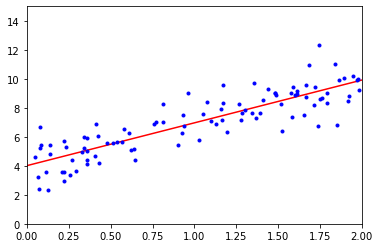

In [13]:
plt.plot(X_new, y_predict, "r-") # r: red, - : line
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

#### 사이킷런으로 선형회귀 예측 결과 구현하기

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()      # LinearRegression() 클래스 호출
lin_reg.fit(X, y)                 # .fit(x, y): 데이터 이용해 모델 생성
lin_reg.intercept_, lin_reg.coef_ # .intercept_ : 실수값 1개, .coef_ : numpy 배열

(array([4.01280403]), array([[2.95093358]]))

In [15]:
X_new = np.array([[0], [2]])

lin_reg.predict(X_new)            # .predict(x): 모델 예측

array([[4.01280403],
       [9.91467118]])

### 4.2.1 배치 경사 하강법

#### 배치 경사 하강법을 사용한 선형회귀 예측 결과 구현하기

In [16]:
eta = 0.1                    # 학습률
n_iterations = 1000          # 반복 횟수
m = 100                      # 샘플 수

theta = np.random.randn(2,1) # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.01280403],
       [2.95093358]])

## 4.3 다항 회귀

#### 2차 방정식으로 비선형 데이터 생성하기

In [17]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [18]:
X[:5]

array([[-0.13473586],
       [-2.13836656],
       [ 2.5557315 ],
       [ 2.02108893],
       [ 1.87110656]])

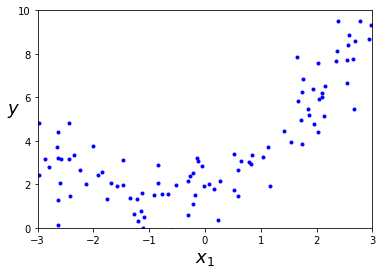

In [19]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18) # rotation: angle in degrees
plt.axis([-3, 3, 0, 10])
plt.show()

#### 확장된 훈련 데이터에 선형회귀 적용하기

In [20]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures: 훈련 세트(X)에 있는 각 특성을 제곱(degree=2)하여 새로운 훈련 데이터셋(X_poly)으로 만듦
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [21]:
X_poly[:5]

array([[-0.13473586,  0.01815375],
       [-2.13836656,  4.57261152],
       [ 2.5557315 ,  6.53176351],
       [ 2.02108893,  4.08480045],
       [ 1.87110656,  3.50103975]])

In [22]:
lin_reg = LinearRegression()      # LinearRegression() 클래스 호출
lin_reg.fit(X_poly, y)            # .fit(x, y): 데이터 이용해 모델 생성
lin_reg.intercept_, lin_reg.coef_ # .intercept_: 실수값 1개, .coef_: numpy 배열

(array([1.88273974]), array([[1.01636774, 0.53944821]]))

In [23]:
np.linspace(-3, 3, 10).reshape(10,1)

array([[-3.        ],
       [-2.33333333],
       [-1.66666667],
       [-1.        ],
       [-0.33333333],
       [ 0.33333333],
       [ 1.        ],
       [ 1.66666667],
       [ 2.33333333],
       [ 3.        ]])

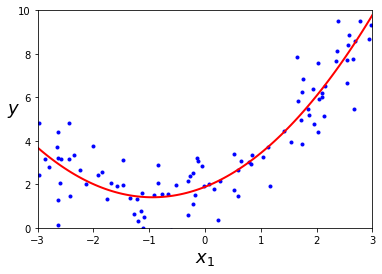

In [24]:
X_new = np.linspace(-3, 3, 100).reshape(100,1) # numpy.linspace(start, stop, num=50): start이상 stop이하까지 균일 간격으로 num개의 수 생성
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

## 4.4 학습곡선

#### 모델의 일반화 성능 추정(1): 단순 선형 회귀 모델(직선)의 학습 곡선 그리기

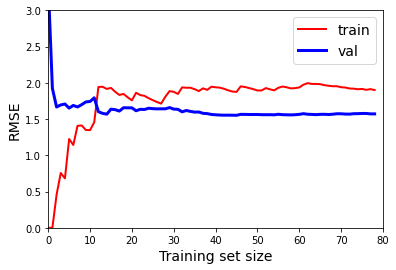

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10) # 데이터셋 분류
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

train set에 대한 오차가 높아지다가 점차적으로 1.5 정도에 수렴한다. validation set에 대한 오차도 처음에는 크지만 점차적으로 낮아져 수렴하고 있다. 하지만 train set에 대한 오차와 validation set에 대한 오차 차이가 작아 Underfitting 되었다고 할 수 있다.

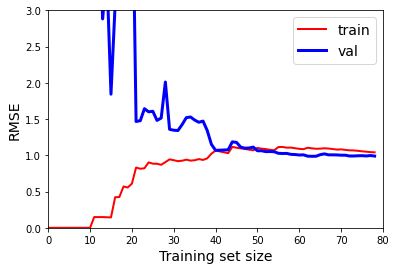

In [26]:
from sklearn.pipeline import Pipeline

# PolynomialFeatures(): 훈련 세트(X)에 있는 각 특성을 10제곱(degree=10)하여 새로운 훈련 데이터셋(X_poly)으로 만듦
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=True)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

train set에 대한 오차는 trains set이 늘어나면서 1.0 정도에 수렴한다. validation ste은 처음에는 오차가 상당히 높지만, 데이터가 늘어나면서 점차적으로 오차가 낮아져 수렴하고 있다. 하지만 train set에 대한 오차와 validation set에 대한 오차가 상대적으로 차이가 나기 때문에 Overfitting 되었다고 할 수 있다.

### 4.5.1 릿지 회귀

릿지 회귀: 규제(L2 norm)가 추가된 선형 회귀

In [27]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) # solver="cholesky": 계산하는 데 사용하는 알고리즘=숄레스키 분해
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])                                     # 기대값 = 1.5

array([[5.27090989]])

### 4.5.2 라쏘 회귀

라쏘 회귀: 규제(L1 norm)가 추가된 선형 회귀

In [30]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.23323347])

### 4.5.3 엘라스틱넷

엘라스틱넷: 릿지 회귀와 라쏘 회귀를 절충한 모델, 혼합 비율 r로 정도 조절

In [31]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42) # l1_ratio: 혼합 비율
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.23272119])

## 4.6 로지스틱 회귀

### 4.6.3 결정 경계

데이터 로드

In [32]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [42]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
iris["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [37]:
iris["target"][-5:]

array([2, 2, 2, 2, 2])

In [39]:
X = iris["data"][:, 3:]               # data 정보 중 꽃잎 넓이만 별도로 X에 저장
y = (iris["target"] == 2).astype(int) # iris virginica이면 1 아니면 0으로 분류

로지스틱 회귀 모델 훈련

In [40]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

꽃잎의 너비가 0~3cm인 꽃에 대한 모델 추정 확률 계산

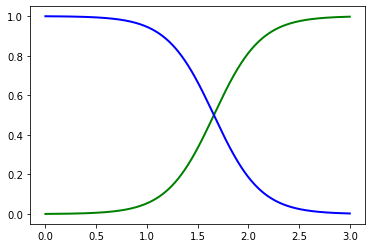

In [41]:
# np.linspace(x,y,z): x~y 범위의 균일한 점 z개로 구성된 벡터 생성, reshape(-1, 1): 열 1개로 구성된 배열로 변경
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")     # g: green
plt.plot(X_new, y_proba[:, 0], "b-", linewidth=2, label="Not Iris virginica") # b: blue

### 4.6.4 소프트맥스 회귀

In [43]:
X = iris["data"][:, (2,3)] # data 정보 중 꽃잎 길이, 꽃잎 너비만 별도로 X에 저장
y = iris["target"]

# multinomial: 다항 클래스, C: L2 규제를 위한 cost function, C 값이 클 경우 약한 규제
softmax_reg = LogisticRegression(multi_class="multinomial", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [44]:
softmax_reg.predict([[5, 2]]) # class 예측

array([2])

In [45]:
softmax_reg.predict_proba([[5, 2]]) # class별 확률 예측

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])